In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import math as math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
class Estimator:
    def __init__(self, function, tex_description):
        self.function = function
        self.tex_description = tex_description
        
class E(Estimator):
    def __init__(self, k):
        Estimator.__init__(
            self,
            lambda sample:
                math.pow(math.factorial(k) / np.power(sample, k).mean(), 1/k),
            r"$(k!/\overline{X^{" + str(k) + r"}})^{1/" + str(k) + r"}$")
        
theta_cup = [E(i) for i in range(1, 21)]

In [29]:
def gen_prefixes(some_list):
    prefixes = []
    for i in range(1, len(some_list) + 1):
        prefixes.append(some_list[0:i])
    return prefixes

def normalize(values, teta):
    return list(map(lambda x: abs(x - teta), values))

def draw_plot(sample, theta, estimators, plot_height):
    sample_prefixes = gen_prefixes(sample)
    plt.figure(figsize=(12, 5)).suptitle("theta = " + str(theta), fontsize=14)
    plt.axis([0, len(sample), 0, plot_height])
    plt.rc('text', usetex=True)
    
    for estimator in estimators:
        #считаем оценку параметра на каждом префиксе выборки
        #затем «нормализуем»: находим модуль разности
        #между истинным значением и оценкой
        plt.plot(normalize(map(estimator.function, sample_prefixes), theta),
                 label=estimator.tex_description)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [25]:
N = 10000
theta = 1
sample = sps.expon.rvs(size=N)

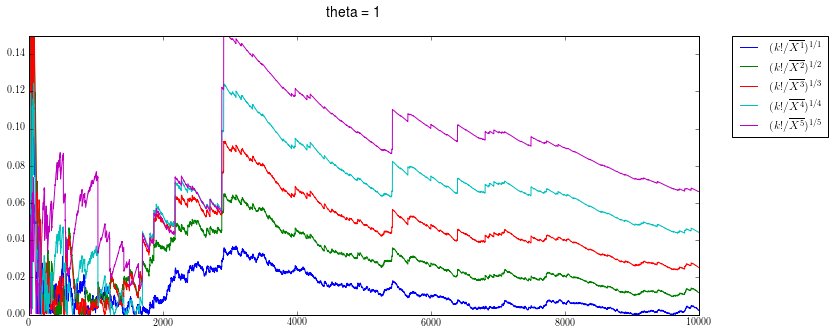

In [33]:
plot_height = 0.15
draw_plot(sample, theta, theta_cup[0:5], plot_height)

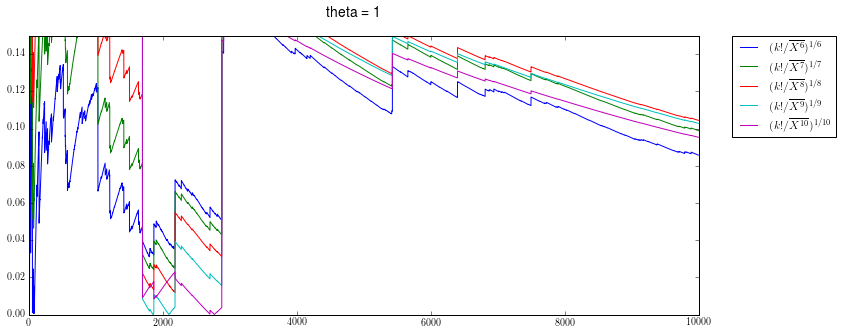

In [34]:
draw_plot(sample, theta, theta_cup[5:10], plot_height)

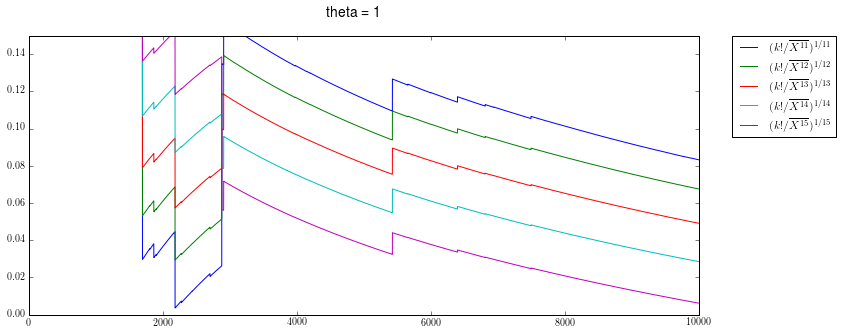

In [37]:
draw_plot(sample, theta, theta_cup[10:15], plot_height)

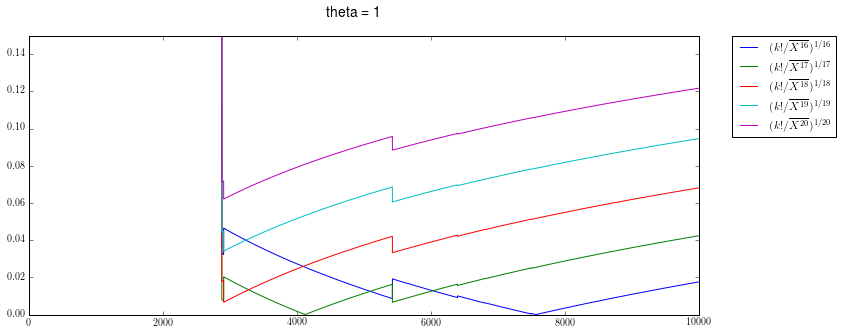

In [38]:
draw_plot(sample, theta, theta_cup[15:20], plot_height)